# Capstone Project — The Battle of Neighbourhoods

## Business Problem-
### Travel companies are always in a search to provide best services in order to charge good amount of money to the customers by taking them to the particular food joints they have tie-ups with. Now this does not necessarily mean that those food joints serve the best variational food. To simply put it, local people know more(better) about the place/neighbourhood food than the travel agency "claim to know". So, the problem is how to determine these places in the neighbourhood?

## Data-
### For this project we need the following data : New Delhi Restaurants data that contains list Locality, Restaurant name, Rating along with their latitude and longitude.
### Data source : Zomato Kaggle dataset
### Description : This data set contains the required information. And we will use this data set to explore various locality of new Delhi city. Nearby places in each locality of new Delhi city.
### Data source : Fousquare API
### Description : By using this API we will get all the venues in each neighbourhood.


In [1]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
! pip install folium
import folium # map rendering library
! pip install geocoder
import geocoder

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are missing from the target environment:
  - nodejs==11
  - scikit-learn==0.21
  - tensorflow==1.13




## Read the zomato resturant data from csv file

In [2]:
df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df_india = df[df['Country Code'] == 1]
## New Delhi
df_NDLS = df_india[df_india['City'] == 'New Delhi']

df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

## Data Cleaning 
#### remove the unwanted columns and rows from dataset

In [3]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [4]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [5]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

### created map to show the restaurant cluters

In [6]:
ND = folium.Map(location=[28.52, 77.25], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(ND)  

ND

In [7]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Cluster  
1        0  
2        0  
3        0  
4        0  
5        0

## What places are have best restaurant in New Delhi?

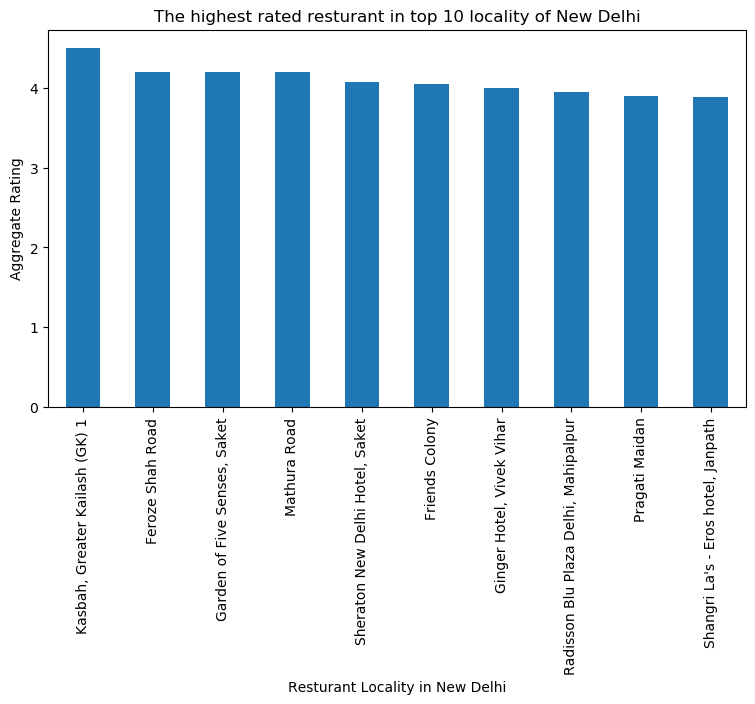

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

## Data transformation
### "Based on Locality grouping the data"

In [9]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [10]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [11]:
df_final.shape

(240, 8)

# Foursquare Credentials

In [12]:
CLIENT_ID = 'UM4KUQOANLE54FNHAZNTFC0KGJTF042JN35HWFOHM1XIQRFE' # Foursquare ID
CLIENT_SECRET = '1TFWLNRUDNOZJZE0ZFNQMVWHONAX3KXBJTAOIROJSD55TVZB' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + 'XXXXXXXXXXXXXXXXXXXXXXX')
print('CLIENT_SECRET:' + 'XXXXXXXXXXXXXXXXXXXX')

Your credentails:
CLIENT_ID: XXXXXXXXXXXXXXXXXXXXXXX
CLIENT_SECRET:XXXXXXXXXXXXXXXXXXXX


## create a function to repeat the same process to all the Locality in New Delhi

In [13]:

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## find the venues in all New Delhi Locality

In [14]:
# find the venues in all New Delhi Locality
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [15]:
new_Delhi_venues.head()

Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1                    Pizza Hut       28.670321        77.103853   
2              Café Coffee Day       28.670009        77.102480   
3  Baljeet's Amritsari Koolcha       28.665768        77.100481   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1         Pizza Place  
2         Coffee Shop  
3   Indian Restaurant  
4  Chinese Restaurant

In [16]:
new_Delhi_venues.groupby('Locality').count()

Locality Latitude  \
Locality                                                            
ARSS Mall, Paschim Vihar                                        9   
Adchini                                                         7   
Aditya Mega Mall, Karkardooma                                  10   
Aerocity                                                        7   
Aggarwal City Mall, Pitampura                                   4   
Aggarwal City Plaza, Rohini                                     8   
Alaknanda                                                       4   
Ambience Mall, Vasant Kunj                                     46   
Anand Lok                                                      11   
Anand Vihar                                                     5   
Andaz Delhi, Aerocity                                          25   
Ansal Plaza Mall, Khel Gaon Marg                                5   
Asaf Ali Road                                                   7   
Ashok Vihar Phase 1                                             7   
Ashok Vihar Phase 2                                             7   
Ashok Vihar Phase 3                                             4   
Barakhamba Road                                                14   
Basant Lok Market, Vasant Vihar                                26   
Bellagio, Ashok Vihar Phase 2                                   7   
Best Western Taurus Hotel, Mahipalpur                          12   
Bhikaji Cama Place                                             13   
Chanakyapuri                                                    5   
Chander Nagar                                                   2   
Chandni Chowk                                                  19   
Chawri Bazar                                                    7   
Chhatarpur                                                      6   
Chittaranjan Park                                               5   
City Centre Mall, Rohini                                        6   
City Square Mall, Rajouri Garden                               26   
Civil Lines                                                     5   
...                                                           ...   
The Leela Ambience Convention Hotel                             4   
The Leela Palace, Chanakyapuri                                 13   
The Lodhi, Lodhi Road                                          13   
The Park, Connaught Place                                      28   
The Suryaa New Delhi, New Friends Colony                       20   
The Taj Mahal Hotel, Mansingh Road                              8   
The Taj Palace Hotel, Chanakyapuri                             34   
The Uppal, Aerocity                                             4   
The Village Restaurant Complex, Khel Gaon Marg                 13   
Tilak Nagar                                                     6   
Tughlakabad Institutional Area                                  4   
Uday Park                                                       7   
Unity One Mall, Janakpuri                                       8   
Uttam Nagar                                                     2   
V3S Mall, Laxmi Nagar                                          18   
Vasant Kunj                                                     6   
Vasant Square Mall, Vasant Kunj                                 8   
Vasant Vihar                                                   29   
Vasundhara Enclave                                              2   
Vijay Nagar                                                    11   
Vikas Marg                                                      4   
Vikaspuri                                                       2   
Vivek Vihar                                                     7   
Wazirpur                                                        1   
West End Mall, Janak Puri                                      16   
West Gate Mall, Rajouri Garden                

## Analyze Each Locality

In [17]:
# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  Accessories Store  Afghan Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                  0   
1  ARSS Mall, Paschim Vihar    0                  0                  0   
2  ARSS Mall, Paschim Vihar    0                  0                  0   
3  ARSS Mall, Paschim Vihar    0                  0                  0   
4  ARSS Mall, Paschim Vihar    0                  0                  0   

   African Restaurant  Airport  Airport Food Court  Airport Lounge  \
0                   0        0                   0               0   
1                   0        0                   0               0   
2                   0        0                   0               0   
3                   0        0                   0               0   
4                   0        0                   0               0   

   Airport Service  Airport Terminal  ...  Trail  Train Station  \
0                0                 0  ...      0              0   
1                0                 0  ...      0              0   
2                0                 0  ...      0              0   
3                0                 0  ...      0              0   
4                0                 0  ...      0              0   

   Turkish Restaurant  Udupi Restaurant  Vegetarian / Vegan Restaurant  \
0                   0                 0                              0   
1                   0                 0                              0   
2                   0                 0                              0   
3                   0                 0                              0   
4                   0                 0                              0   

   Vietnamese Restaurant  Whisky Bar  Wine Bar  Wings Joint  Women's Store  
0                      0           0         0            0              0  
1                      0           0         0            0              0  
2                      0           0         0            0              0  
3                      0           0         0            0              0  
4                      0           0         0            0              0  

[5 rows x 214 columns]

In [18]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality       ATM  \
0                          ARSS Mall, Paschim Vihar  0.111111   
1                                           Adchini  0.000000   
2                     Aditya Mega Mall, Karkardooma  0.000000   
3                                          Aerocity  0.000000   
4                     Aggarwal City Mall, Pitampura  0.000000   
5                       Aggarwal City Plaza, Rohini  0.000000   
6                                         Alaknanda  0.000000   
7                        Ambience Mall, Vasant Kunj  0.000000   
8                                         Anand Lok  0.000000   
9                                       Anand Vihar  0.000000   
10                            Andaz Delhi, Aerocity  0.000000   
11                 Ansal Plaza Mall, Khel Gaon Marg  0.000000   
12                                    Asaf Ali Road  0.000000   
13                              Ashok Vihar Phase 1  0.000000   
14                              Ashok Vihar Phase 2  0.000000   
15                              Ashok Vihar Phase 3  0.000000   
16                                  Barakhamba Road  0.000000   
17                  Basant Lok Market, Vasant Vihar  0.000000   
18                    Bellagio, Ashok Vihar Phase 2  0.000000   
19            Best Western Taurus Hotel, Mahipalpur  0.000000   
20                               Bhikaji Cama Place  0.000000   
21                                     Chanakyapuri  0.000000   
22                                    Chander Nagar  0.000000   
23                                    Chandni Chowk  0.000000   
24                                     Chawri Bazar  0.000000   
25                                       Chhatarpur  0.000000   
26                                Chittaranjan Park  0.000000   
27                         City Centre Mall, Rohini  0.000000   
28                 City Square Mall, Rajouri Garden  0.000000   
29                                      Civil Lines  0.000000   
..                                              ...       ...   
210             The Leela Ambience Convention Hotel  0.000000   
211                  The Leela Palace, Chanakyapuri  0.000000   
212                           The Lodhi, Lodhi Road  0.000000   
213                       The Park, Connaught Place  0.000000   
214        The Suryaa New Delhi, New Friends Colony  0.000000   
215              The Taj Mahal Hotel, Mansingh Road  0.000000   
216              The Taj Palace Hotel, Chanakyapuri  0.000000   
217                             The Uppal, Aerocity  0.000000   
218  The Village Restaurant Complex, Khel Gaon Marg  0.000000   
219                                     Tilak Nagar  0.000000   
220                  Tughlakabad Institutional Area  0.000000   
221                                       Uday Park  0.000000   
222                       Unity One Mall, Janakpuri  0.000000   
223                                     Uttam Nagar  0.500000   
224                           V3S Mall, Laxmi Nagar  0.000000   
225                                     Vasant Kunj  0.000000   
226                 Vasant Square Mall, Vasant Kunj  0.000000   
227                                    Vasant Vihar  0.000000   
228                              Vasundhara Enclave  0.000000   
229                                     Vijay Nagar  0.000000   
230                                      Vikas Marg  0.000000   
231                                       Vikaspuri  0.000000   
232                                     Vivek Vihar  0.000000   
233                                        Wazirpur  0.000000   
234                       West End Mall, Janak Puri  0.000000   
235                  West Gate Mall, Rajouri Garden  0.000000   
236                                West Patel Nagar  0.000000   
237                           Worldmark 1, Aerocity  0.000000   
238                                     Yusuf Sarai  0.000000   
239                        ibis New Delhi, Aerocity  0.000000   

     Accesso

In [19]:
New_Delhi_grouped.shape

(240, 214)

In [20]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
                            venue  freq
0               Indian Restaurant  0.22
1                             ATM  0.11
2                     Coffee Shop  0.11
3  Multicuisine Indian Restaurant  0.11
4                          Market  0.11


----Adchini----
               venue  freq
0  Indian Restaurant  0.29
1               Café  0.29
2                Pub  0.14
3   Parsi Restaurant  0.14
4        Coffee Shop  0.14


----Aditya Mega Mall, Karkardooma----
               venue  freq
0        Pizza Place   0.2
1          Multiplex   0.2
2      Shopping Mall   0.2
3  Indian Restaurant   0.2
4               Café   0.1


----Aerocity----
                  venue  freq
0                 Hotel  0.29
1      Airport Terminal  0.14
2           Coffee Shop  0.14
3        Airport Lounge  0.14
4  Fast Food Restaurant  0.14


----Aggarwal City Mall, Pitampura----
                  venue  freq
0      Department Store  0.25
1  Fast Food Restaurant  0.25
2             Mu

In [21]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

## create the new dataframe and display the top 10 venues for each Locality

In [22]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality  \
0                          ARSS Mall, Paschim Vihar   
1                                           Adchini   
2                     Aditya Mega Mall, Karkardooma   
3                                          Aerocity   
4                     Aggarwal City Mall, Pitampura   
5                       Aggarwal City Plaza, Rohini   
6                                         Alaknanda   
7                        Ambience Mall, Vasant Kunj   
8                                         Anand Lok   
9                                       Anand Vihar   
10                            Andaz Delhi, Aerocity   
11                 Ansal Plaza Mall, Khel Gaon Marg   
12                                    Asaf Ali Road   
13                              Ashok Vihar Phase 1   
14                              Ashok Vihar Phase 2   
15                              Ashok Vihar Phase 3   
16                                  Barakhamba Road   
17                  Basant Lok Market, Vasant Vihar   
18                    Bellagio, Ashok Vihar Phase 2   
19            Best Western Taurus Hotel, Mahipalpur   
20                               Bhikaji Cama Place   
21                                     Chanakyapuri   
22                                    Chander Nagar   
23                                    Chandni Chowk   
24                                     Chawri Bazar   
25                                       Chhatarpur   
26                                Chittaranjan Park   
27                         City Centre Mall, Rohini   
28                 City Square Mall, Rajouri Garden   
29                                      Civil Lines   
..                                              ...   
210             The Leela Ambience Convention Hotel   
211                  The Leela Palace, Chanakyapuri   
212                           The Lodhi, Lodhi Road   
213                       The Park, Connaught Place   
214        The Suryaa New Delhi, New Friends Colony   
215              The Taj Mahal Hotel, Mansingh Road   
216              The Taj Palace Hotel, Chanakyapuri   
217                             The Uppal, Aerocity   
218  The Village Restaurant Complex, Khel Gaon Marg   
219                                     Tilak Nagar   
220                  Tughlakabad Institutional Area   
221                                       Uday Park   
222                       Unity One Mall, Janakpuri   
223                                     Uttam Nagar   
224                           V3S Mall, Laxmi Nagar   
225                                     Vasant Kunj   
226                 Vasant Square Mall, Vasant Kunj   
227                                    Vasant Vihar   
228                              Vasundhara Enclave   
229                                     Vijay Nagar   
230                                      Vikas Marg   
231                                       Vikaspuri   
232                                     Vivek Vihar   
233                                        Wazirpur   
234                       West End Mall, Janak Puri   
235                  West Gate Mall, Rajouri Garden   
236                                West Patel Nagar   
237                           Worldmark 1, Aerocity   
238                                     Yusuf Sarai   
239                        ibis New Delhi, Aerocity   

          1st Most Common Venue          2nd Most Common Venue  \
0             Indian Restaurant                            ATM   
1             Indian Restaurant                           Café   
2             Indian Restaurant                      Multiplex   
3                         Hotel            Rental Car Location   
4              Department Store             Chinese Restaurant   
5          Fast Food Restaurant                    Pizza Place   
6                        Market                    Coffee Shop   
7                   Coffee Shop           Fast Food Restaurant   
8                          Café       

## Cluster Locality
## Run k-means to cluster the Locality into 4 clusters.

In [24]:
# set number of clusters
kclusters = 4

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(240,)

In [25]:
# add clustering labels
New_Delhi_merged = df_final.head(240)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               0   
1  Average, Good, Poor, Very Good         1560               0   
2                   Average, Good          434               0   
3                         Average           59               3   
4                         Average          126               1   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant                   ATM                Market   
1     Indian Restaurant                  Café      Parsi Restaurant   
2     Indian Restaurant             Multiplex         Shopping Mall   
3                 Hotel   Rental Car Location        Airport Lounge   
4      Department Store    Chinese Restaurant             Multiplex   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0           Coffee Shop    Chinese Restaurant        Sandwich Place   
1                   Pub           Coffee Shop  Fast Food Restaurant   
2           Pizza Place                  Café                 Hotel   
3           Coffee Shop      Airport Terminal  Fast Food Restaurant   
4  Fast Food Restaurant                 Diner                  Food   

            7th Most Common Venue   8th Most Common Venue  \
0  Multicuisine Indian Restaurant             Pizza Place   
1              Frozen Yogurt Shop     Fried Chicken Joint   
2                     Flea Market      Frozen Yogurt Shop   
3               French Restaurant     Fried Chicken Joint   
4                     Gaming Cafe  Furniture / Home Store   

  9th Most Common Venue 10th Most Common Venue  
0         Hot Dog Joint                 Hostel  
1     French Restaurant             Food Truck  
2      Department Store    Fried Chicken Joint  
3     Fish & Chips Shop     Frozen Yogurt Shop  
4    Frozen Yogurt Shop           Dessert Shop

In [26]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

In [27]:
## Cluster 1
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
0    28.668945    3.100000                                    Average   
1    28.537063    3.292308             Average, Good, Poor, Very Good   
2    28.656131    3.275000                              Average, Good   
12   28.641698    3.050000                                    Average   
13   28.690182    3.090000                        Average, Good, Poor   
16   28.630440    3.208333                        Average, Good, Poor   
23   28.656414    3.358182                   Average, Good, Very Good   
24   28.649658    3.800000        Average, Excellent, Good, Very Good   
26   28.538688    3.130303                        Average, Good, Poor   
42   28.576161    2.983333                        Average, Good, Poor   
43   28.643320    3.287500             Average, Good, Poor, Very Good   
46   28.573241    3.225000                        Average, Good, Poor   
48   28.630149    2.950000                        Average, Good, Poor   
49   28.602169    2.900000                                    Average   
55   28.617102    4.200000                                  Very Good   
61   28.668181    3.400000                                    Average   
65   28.556980    3.272414                        Average, Good, Poor   
66   28.699373    3.252174                              Average, Good   
71   28.641003    3.650000                              Average, Good   
76   28.576785    3.200000                              Average, Good   
77   28.631728    3.060714             Average, Good, Poor, Very Good   
82   28.548371    3.137500                        Average, Good, Poor   
84   28.630942    3.122000             Average, Good, Poor, Very Good   
85   28.648885    3.561111                   Average, Good, Very Good   
92   28.584294    3.100000                                    Average   
97   28.662972    3.533333                         Average, Very Good   
98   28.651527    3.490909                   Average, Good, Very Good   
99   28.648795    3.238028             Average, Good, Poor, Very Good   
110  28.635391    3.040385             Average, Good, Poor, Very Good   
113  28.541242    2.984615                                    Average   
116  28.486576    2.950000                                    Average   
118  28.646549    3.200000                                    Average   
124  28.521760    4.200000                                  Very Good   
126  28.602860    2.973214                        Average, Good, Poor   
133  28.708185    3.344444                   Average, Good, Very Good   
138  28.556145    3.040909                        Average, Good, Poor   
140  28.627959    3.004167                                    Average   
144  28.591092    3.200000                        Average, Good, Poor   
153  28.608055    3.860000                   Average, Good, Very Good   
156  28.630734    3.185714                              Average, Good   
157  28.629505    2.600000                                    Average   
158  28.700027    3.157333                        Average, Good, Poor   
160  28.712975    3.066667                                    Average   
165  28.539464    2.900000                                    Average   
172  28.644281    3.626804  Average, Excellent, Good, Poor, Very Good   
173  28.714176    3.352083             Average, Good, Poor, Very Good   
194  28.566717    3.303125                   Average, Good, Very Good   
198  28.636712    3.023529                              Average, Poor   
199  28.601779    3.700000                   Average, Good, Very Good   
204  28.597038    3.533333                   Average, Good, Very Good   
209  28.631362    3.537500                              Average, Good   
212  28.592147    3.350000                              Average, Good   
223  28.619954    2.905714                              Average, Poor   
234  28.630044    2.750000                              Average, Poor

In [28]:
## Cluster 2
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                        Comments  No_of_Votes  \
4    28.690020    3.033333                         Average          126   
5    28.700516    3.040000             Average, Good, Poor          594   
14   28.693969    3.378571                   Average, Good         2343   
15   28.691136    3.390909        Average, Good, Very Good          485   
18   28.696302    3.300000                   Average, Good          415   
22   28.654105    3.085714                         Average           80   
36   28.692546    3.480000                   Average, Good          948   
50   28.645084    3.235000  Average, Good, Poor, Very Good         2578   
57   28.699837    3.376471        Average, Good, Very Good         2460   
73   28.643036    3.000000                         Average            7   
87   28.582031    3.117143  Average, Good, Poor, Very Good         2140   
89   28.539003    3.150000             Average, Good, Poor          893   
90   28.642755    3.450000                   Average, Good          322   
94   28.538153    3.117143             Average, Good, Poor         3642   
95   28.681154    3.453448        Average, Good, Very Good         5267   
101  28.667644    3.300000                         Average          132   
103  28.652501    3.080000             Average, Good, Poor         2196   
104  28.656263    3.097619                   Average, Good          965   
107  28.569394    3.252381                   Average, Good         1525   
122  28.535807    3.417857  Average, Good, Poor, Very Good        12088   
130  28.724100    3.133333                         Average          325   
132  28.706295    3.256000        Average, Good, Very Good         1717   
135  28.579641    3.180000                   Average, Good          202   
136  28.658244    3.240000                   Average, Good          567   
142  28.693270    3.519149        Average, Good, Very Good         7642   
152  28.544464    3.525000              Average, Very Good          231   
155  28.669160    3.148214             Average, Good, Poor         2735   
161  28.639872    3.134483             Average, Good, Poor         1481   
170  28.643757    3.575000                   Average, Good         2879   
171  28.639604    3.056410  Average, Good, Poor, Very Good         5168   
181  28.571849    3.316667                   Average, Good          472   
188  28.707685    3.168182        Average, Good, Very Good         1668   
190  28.577107    3.100000                         Average          114   
193  28.569983    3.133333             Average, Good, Poor          988   
196  28.680905    3.320000                   Average, Good          286   
222  28.628988    3.260000             Average, Good, Poor          239   
225  28.524070    3.686364        Average, Good, Very Good         4001   
226  28.525054    3.322222                   Average, Good         1940   
231  28.637492    3.062264             Average, Good, Poor         1253   
235  28.652978    3.500000                            Good          178   

     Cluster Labels 1st Most Common Venue          2nd Most Common Venue  \
4                 1      Department Store             Chinese Restaurant   
5                 1  Fast Food Restaurant                    Pizza Place   
14                1      Asian Restaurant                    Coffee Shop   
15                1           Pizza Place                         Garden   
18                1      Asian Restaurant                    Coffee Shop   
22                1           Pizza Place                            Gym   
36                1  Fast Food Restaurant              Indian Restaurant   
50                1           Pizza Place             Chinese Restaurant   
57                1           Pizza Place                     Food Truck   
73                1           Pizza Place                          Hotel   
87                1  Fast Food Restaurant                      BBQ Joint   
89                1    

In [29]:
## Cluster 3
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
6    28.527088    3.117391                        Average, Good, Poor   
7    28.541298    3.425000                   Average, Good, Very Good   
8    28.555599    3.800000                         Average, Very Good   
9    28.659870    3.281481                              Average, Good   
11   28.562580    3.750000                   Average, Good, Very Good   
17   28.557846    3.220000                        Average, Good, Poor   
20   28.568193    2.755556                              Average, Poor   
21   28.589797    3.085714                        Average, Good, Poor   
27   28.716874    3.400000                                    Average   
28   28.650254    3.166667                              Average, Good   
29   28.681233    3.300000                   Average, Good, Very Good   
30   28.561898    3.100000                              Average, Good   
31   28.632091    3.779832        Average, Excellent, Good, Very Good   
32   28.718351    3.150000                              Average, Good   
34   28.720602    3.600000                                       Good   
37   28.541903    3.000000                                    Average   
38   28.702961    3.225000                              Average, Good   
39   28.543269    3.650000                                       Good   
40   28.528657    3.700000                   Average, Good, Very Good   
41   28.542647    3.761538                   Average, Good, Very Good   
44   28.574288    3.496154             Average, Good, Poor, Very Good   
45   28.696802    3.296296  Average, Excellent, Good, Poor, Very Good   
47   28.681582    3.046875                        Average, Good, Poor   
51   28.557166    3.080000                         Average, Very Good   
52   28.551417    3.505000                   Average, Good, Very Good   
53   28.549856    3.720000                   Average, Good, Very Good   
54   28.543798    3.500000                              Average, Good   
58   28.514237    4.200000                                  Very Good   
59   28.654883    3.053846                              Average, Good   
62   28.550319    3.701562        Average, Excellent, Good, Very Good   
..         ...         ...                                        ...   
182  28.587918    3.541892  Average, Excellent, Good, Poor, Very Good   
183  28.670776    3.100000                                    Average   
184  28.528743    3.764000  Average, Excellent, Good, Poor, Very Good   
185  28.683364    3.000000                              Average, Good   
186  28.548922    3.715385  Average, Excellent, Good, Poor, Very Good   
187  28.629634    2.942857                                    Average   
191  28.522279    3.100000                                    Average   
192  28.526856    4.066667                                  Very Good   
195  28.527731    3.450000                              Average, Good   
200  28.564288    3.200000                                    Average   
201  28.651299    3.500000                              Average, Good   
202  28.646593    3.280952                   Average, Good, Very Good   
203  28.601187    3.633333                              Average, Good   
206  28.538993    3.450000                              Average, Good   
208  28.562469    2.971429                        Average, Good, Poor   
214  28.561105    3.425000                              Average, Good   
215  28.605069    3.785714                   Average, Good, Very Good   
216  28.594859    3.800000                            Good, Very Good   
218  28.552403    3.833333                            Good, Very Good   
219  28.638846    3.048148                              Average, Good   
220  28.523519    3.700000                                       Good   
221  28.560593    3.733333                   Average, Good, Very Good   
224  28.636921    2.819231                        Average, Good, Poor

In [30]:
## Cluster 4
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
3    28.553077    3.200000                              Average           59   
10   28.554807    3.000000                              Average            4   
19   28.548827    2.700000                              Average            9   
25   28.495624    2.700000                              Average           23   
33   28.657388    3.320000                        Average, Good          636   
35   28.590297    3.350000                        Average, Good          127   
56   28.570246    4.050000                   Average, Excellent         1949   
60   28.665829    4.000000                            Very Good          756   
69   28.550327    3.300000                              Average           30   
70   28.590654    3.550000                        Average, Good          302   
72   28.705700    3.350000                        Average, Good          278   
74   28.621267    3.416667                        Average, Good          475   
83   28.552895    3.300000                              Average           15   
111  28.618772    3.666667             Average, Good, Very Good          725   
112  28.552036    3.500000                                 Good           26   
119  28.545033    2.960000                        Average, Good          259   
120  28.673708    3.133333                              Average          113   
128  28.608252    2.945000                        Average, Good          406   
149  28.642910    2.996552       Average, Good, Poor, Very Good         2850   
162  28.725814    3.050000                              Average           50   
163  28.552711    3.100000                              Average            7   
168  28.543814    3.950000  Average, Excellent, Good, Very Good         1225   
169  28.667261    3.200000                              Average           76   
174  28.550802    3.250000                        Average, Good           34   
189  28.620715    3.880000             Average, Good, Very Good          626   
197  28.592724    2.985714                              Average          560   
205  28.600171    3.714286             Average, Good, Very Good         1733   
207  28.625445    3.600000             Average, Good, Very Good          843   
210  28.661133    3.775000                      Good, Very Good          460   
211  28.579556    3.780000                                 Good          709   
213  28.623619    3.466667                        Average, Good         1141   
217  28.535183    3.066667                              Average           37   
236  28.648177    3.675000             Average, Good, Very Good          876   
237  28.550257    3.220000                        Average, Good           77   
239  28.551398    3.100000                              Average            9   

     Cluster Labels 1st Most Common Venue    2nd Most Common Venue  \
3                 3                 Hotel      Rental Car Location   
10                3                 Hotel        Indian Restaurant   
19                3                 Hotel        Indian Restaurant   
25                3     Indian Restaurant            Luggage Store   
33                3     Indian Restaurant                    Hotel   
35                3                 Hotel        Indian Restaurant   
56                3                 Hotel                     Café   
60                3                 Hotel        Indian Restaurant   
69                3                 Hotel        Indian Restaurant   
70                3                 Hotel               Restaurant   
72                3                 Plaza                    Hotel   
74                3                 Hotel        Indian Restaurant   
83                3                 Hotel        Indian Restaurant   
111               3                 Hotel        Indian Restaurant   
112               3                 Hotel        Indian Restaurant   
119       